Version 2 

In [208]:
import random
import numpy as np
import matplotlib.pyplot as plt

object_array = np.array
# object_array = np.zeros((len(self.obj_set), 2))
def create_dicts(word_text, data_text):

    with open(word_text) as f:
        lines = f.readlines()
        counter = 1
        wordlist_dict = {}
        plot_worddict= {}
        for line in lines:
            line = line.rstrip()
            wordlist_dict[line] = counter
            plot_worddict[counter] = line
            counter += 1

    with open(data_text) as f:
        lines = f.read().splitlines()
        data_dict = {}
        for line in lines:
            line = line.split('\t')
            line = [int(i) for i in line]
            try:
                inner_dict1 = data_dict[line[0]]
            except KeyError:
                data_dict[line[0]] = {}
                inner_dict1 = data_dict[line[0]]
            try:
                inner_dict2 = data_dict[line[1]]
            except KeyError:
                data_dict[line[1]] = {}
                inner_dict2 = data_dict[line[1]]

            inner_dict1[line[1]] = line[2]
            inner_dict2[line[0]] = line[2]

    my_data = np.genfromtxt(data_text, delimiter='\t')
    object_pairs =  np.array(my_data[0:, 0:2])
    distance_array = np.array(my_data[0:,2])
    

    return wordlist_dict, data_dict, plot_worddict, object_pairs, distance_array

    
def distance_function(object1, object2):

    if object1 == object2:
        return 0
    else:
        return data_dict[object1][object2]

def get_distance(object_pairs, distance_set, xi, xj):
    '''
    Get distance from distance set by matching objects to their sets.
    '''
    for idx, my_pair in enumerate(object_pairs):
        if (xi == xj) :
            return 0 
        elif (my_pair[0] == xi and my_pair[1] == xj):
            return distance_set[idx]
        elif (my_pair[1] == xi and my_pair[0] == xj):
            return distance_set[idx]
        else:
            pass


def furthest_function(current_point, prev_point):
    d = data_dict[current_point]
    max_value = max(d.values())
    for k, v in d.items():
        if v == max_value:
            if k == prev_point:
                return current_point, k, max_value
            return furthest_function(k, current_point)


def hyper_plane_projection(object_pairs, distance_set, xi_set, column):
    new_distance_set =np.zeros((len(object_pairs), 1)) #New distance set in projected hyper-plane.
    max_dist = 0
    for idx, pair in enumerate(object_pairs) :
        D_Oij = get_distance(object_pairs, distance_set, pair[0], pair[1])
        Dxij = xi_set[int(pair[0]-1)][int(column)] - xi_set[int(pair[1]-1)][int(column)]
        new_distance_set[idx] = np.sqrt(abs((D_Oij**2)-(Dxij**2)))
        if (new_distance_set[idx] >= max_dist):
            max_dist = new_distance_set[idx]
            mobj_a = pair[0]
            mobj_b = pair[1]
#     print(mobj_a,mobj_b)
    return new_distance_set, mobj_a, mobj_b  

def fastmap(current_step, dim, distance_array):

    """
    fast map array is the main execution funcion
    """
    
    object_array = np.array # Get the dimensions of our array that we wil store x values in
    object_array = np.zeros((len(wordlist_dict), dim)) 
    column = 0 # Start the iterations at comumn 0 of the object_array

    while column < dim:
        if column == 0: #for the first iteration, use the furthest function to get the location of Oa and Ob
            obj_a, obj_b, max_value = furthest_function(random.randint(1, len(wordlist_dict)), -1)
            print(obj_a, obj_b)
            for idx, obj_i in enumerate(wordlist_dict.values()): #1:1, 2:2...  
                dai = distance_function(obj_a, obj_i)
                dab = max_value
                dib = distance_function(obj_i, obj_b)
                xi = (dai**2 + dab**2 - dib**2) / (2*dab)
                object_array[idx][int(column)] = xi
        else:
            obj_a, obj_b = mobj_a, mobj_b   # get oa ob from projected plane 
            for idx, obj_i in enumerate(wordlist_dict.values()):
                dai = get_distance(object_pairs, distance_array, obj_a, obj_i)
                dab = get_distance(object_pairs, distance_array, obj_a, obj_b)
                dib = get_distance(object_pairs, distance_array, obj_i, obj_b)
                xi = (dai**2 + dab**2 - dib**2) / (2*dab)
                print(xi)
                object_array[idx][int(column)] = xi # Store

        column += 1
#         print(f'the len of the dis array is', len(distance_array))   
#         print(distance_array)  
        distance_array, mobj_a, mobj_b = hyper_plane_projection(object_pairs, distance_array, object_array, column-1)
    
    print(object_array)
    return object_array
 
# wordlist_dict, data_dict = create_dicts('C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 3\\fastmap-worldlist.txt', 'C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 3\\fastmap-data.txt')

wordlist_dict, data_dict, plot_worddict, object_pairs, distance_array= create_dicts('C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 3\\fastmap-worldlist.txt', 'C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 3\\fastmap-data.txt')
# print(object_pairs)

object_array = fastmap(1, 2, distance_array)

3 10
[2.75]
[0.25]
[4.]
[5.5]
[7.]
[4.]
[0.]
[7.75]
[8.]
[4.]
[[ 3.875       2.75      ]
 [ 3.          0.25      ]
 [ 0.          4.        ]
 [ 1.04166667  5.5       ]
 [ 2.45833333  7.        ]
 [ 9.5         4.        ]
 [ 2.45833333  0.        ]
 [ 1.5         7.75      ]
 [ 2.45833333  8.        ]
 [12.          4.        ]]


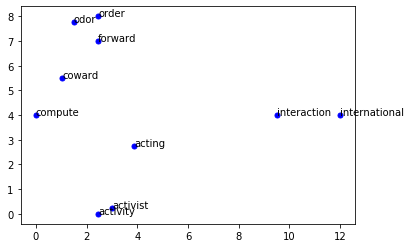

In [209]:
def plot(object_array,plot_worddict):    
    for i in range(len(object_array)):
        x = object_array[i][0]
        y = object_array[i][1]
        plt.plot(x, y, 'b.', markersize=10)
        plt.annotate(plot_worddict[i+1], xy = (x, y))
    plt.show()

plot(object_array,plot_worddict)

In [160]:
print(distance_array)
for value in wordlist_dict:
    print(value)
for k,v in enumerate(wordlist_dict.values()):
    print(k, v)

    print(wordlist_dict)

[ 4.  7.  6.  7.  7.  4.  6.  6. 10.  7.  7.  8.  9.  2.  8.  8. 11.  5.
  6. 10.  6.  6.  6. 12.  2. 10.  7.  4.  5. 12. 10.  8.  5.  4. 13.  9.
 10.  9.  4.  8.  8. 15.  2. 12. 11.]
acting
activist
compute
coward
forward
interaction
activity
odor
order
international
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
{'acting': 1, 'activist': 2, 'compute': 3, 'coward': 4, 'forward': 5, 'interaction': 6, 'activity': 7, 'odor': 8, 'order': 9, 'international': 10}


FAST MAP EXAMPLE

In [7]:

import math
import random
# need scipy as usual

import scipy
# we will repeat the pick-pivot points heuristic this many times
# a higher value means "better" results, but 1 also works well
DISTANCE_ITERATIONS = 1

class FastMap(object):
    
    def __init__(self, dist, verbose=False):
        if dist.max() > 1:

            dist /= dist.max()

        self.dist = dist
        self.verbose = verbose

    def _furthest(self, o):
        mx = -1000000
        idx = -1
        for i in range(len(self.dist)):
            d = self._dist(i, o, self.col)
            if d > mx:
                mx = d
                idx = i
        return idx

    
    def _pickPivot(self):
        
        """Find the two most distant points"""
        o1 = random.randint(0, len(self.dist) - 1)
        o2 = -1
        i = DISTANCE_ITERATIONS

        while i > 0:
            o = self._furthest(o1)
            if o == o2:
                break
            o2 = o
            o = self._furthest(o2)
            if o == o1:
                break
            o1 = o
            i -= 1
        self.pivots[self.col] = (o1, o2)
        return (o1, o2)



    def _map(self, K):
        if K == 0:
            return
        
        px, py = self._pickPivot()
        if self.verbose:
            print "Picked %d, %d at K = %d" % (px, py, K)
            
        if self._dist(px, py, self.col) == 0:
            return



        for i in range(len(self.dist)):

            self.res[i][self.col] = self._x(i, px, py)



        self.col += 1

        self._map(K - 1)



    def _x(self, i, x, y):

        """Project the i'th point onto the line defined by x and y"""

        dix = self._dist(i, x, self.col)

        diy = self._dist(i, y, self.col)

        dxy = self._dist(x, y, self.col)

        return (dix + dxy - diy) / 2 * math.sqrt(dxy)



    def _dist(self, x, y, k):

        """Recursively compute the distance based on previous projections"""
        if k == 0:
            return self.dist[x, y] ** 2
        rec = self._dist(x, y, k - 1)
        resd = (self.res[x][k] - self.res[y][k]) ** 2
        return rec - resd

    def map(self, K):
        self.col = 0
        self.res = scipy.zeros((len(self.dist), K))
        self.pivots = scipy.zeros((K, 2), "i")
        self._map(K)
        return self.res



def fastmap(dist, K):
    """dist is a NxN distance matrix
    returns coordinates for each N in K dimensions

    """
    return FastMap(dist, verbose=True).map(K)





# Below here are methods for testing



def vlen(x, y):

    return math.sqrt(sum((x - y) ** 2))





def distmatrix(p, c=vlen):

    dist = scipy.zeros((len(p), len(p)))
    for x in range(len(p)):
        for y in range(x, len(p)):
            if x == y:
                continue
            dist[x, y] = c(p[x], p[y])

            dist[y, x] = dist[x, y]



    return dist

def distortion(d1, d2):

    return scipy.sum(((d1 / d1.max()) - (d2 / d2.max())) ** 2) / d1.size

def distortiontest():
    import pylab
    points = []
    n = 10
    mean = 10
    dim = 5
    print "Generating %d %d-D points randomly distributed between [0-%d]" % \
          (n, dim, mean)
    while n > 0:

        points.append(scipy.array([random.uniform(0, mean)

                                   for x in range(dim)]))

        n -= 1

    print "Computing distance matrix"

    dist = distmatrix(points)

    print "Mapping"
    p1 = fastmap(dist, 1)
    print "K = 1"
    print "Distortion: ", distortion(distmatrix(p1), dist)

    p2 = fastmap(dist, 2)
    print "K = 2"
    print "Distortion: ", distortion(distmatrix(p1), dist)

    p3 = fastmap(dist, 3)
    print "K = 3"
    print "Distortion: ", distortion(distmatrix(p3), dist)



    pylab.scatter([x[0] / mean for x in points],

                  [x[1] / mean for x in points], s=50)

    pylab.scatter([x[0] for x in p2],

                  [x[1] for x in p2], c="r")

    pylab.show()

def stringtest():

    import pylab
    import Levenshtein
    strings = ["King Crimson",

               "King Lear",

               "Denis Leary",

               "George Bush",

               "George W. Bush",

               "Barack Hussein Obama",

               "Saddam Hussein",

               "George Leary"]

    dist = distmatrix(strings, c=lambda x, y: 1 - Levenshtein.ratio(x, y))
    p = fastmap(dist, 2)
    pylab.scatter([x[0] for x in p], [x[1] for x in p], c="r")

    for i, s in enumerate(strings):
        pylab.annotate(s, p[i])
    pylab.title("Levenshtein distance mapped to 2D coordinates")
    pylab.show()


if __name__ == '__main__':
    stringtest()
    #distortiontest()



SyntaxError: invalid syntax (<ipython-input-7-c782b9f1a054>, line 1)

In [ ]:
[[10.3, 11.4, 11.1, 10.666666666666666, 11.0, 5.333333333333333, 15.0, 10.166666666666666, 9.4, 0.0]]

In [22]:
self.obj_k_d

NameError: name 'self' is not defined